In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dep15/NEWDWTNEWALLFsubjectS15,MDD15.npy
/kaggle/input/dep15/NEWwevletat15,15.npy


# 1 Import the necessary libraries

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 2 Load the data

In [3]:
Features = np.load('/kaggle/input/dep15/NEWDWTNEWALLFsubjectS15,MDD15.npy')
Target = np.load('/kaggle/input/dep15/NEWwevletat15,15.npy').ravel()

# 3 Split the data into training and testing

In [4]:
X_train,X_test,y_train,y_test = train_test_split(Features,Target,test_size=0.8,random_state=42)

# 4 KNN model

In [5]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

# 5 Predict the test data

In [6]:
y_pred = knn.predict(X_test)

# 6 Print the Accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8873699950899433


# 7 Confusion matrix

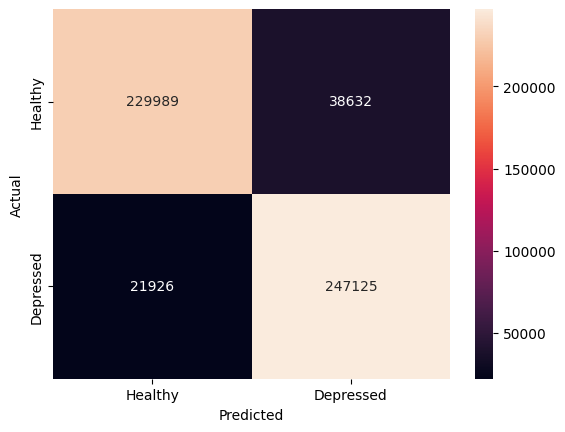

In [8]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['Healthy','Depressed']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 8 Scaled Confusion matrix

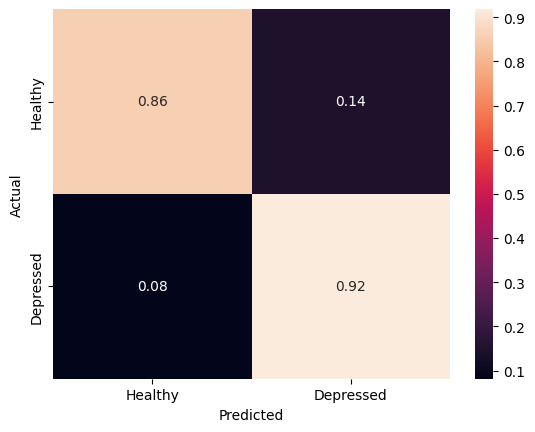

In [9]:
row_sums = cm.sum(axis=1, keepdims=True)
scaled_cm = cm / row_sums
class_names = ['Healthy','Depressed']
sns.heatmap(scaled_cm, annot=True, fmt=".2f", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [10]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.91      0.86      0.88    268621
           1       0.86      0.92      0.89    269051

    accuracy                           0.89    537672
   macro avg       0.89      0.89      0.89    537672
weighted avg       0.89      0.89      0.89    537672

